In [ ]:
import math
more = True
while more == True:
    Invalid = False
    option = input("same bond as before (1) or new bond (2)? ")
    if int(option) == 1:
        yld = input("Enter required yield (as a percentage): ")
        if freq.upper() == "S":
            yld = float(yld)/(2*100)
            par = float(par)
            coupon = float(par)*float(coup_rate)/(2*100)
            periods = 2*float(plazo)
        else:
            yld = float(yld)/100
            par = float(par)
            coupon = float(par)*float(coup_rate)/100
            periods = float(plazo)
    elif int(option) == 2:
        yld = input("Enter required yield (as a percentage): ")
        par = input("Enter par value: ")
        freq = input("Annual or semi-annual? (a/s): ")
        coup_rate = input("Enter coupon rate(as a percentage): ")
        plazo = input("Enter term to maturity in years: ")

        if freq.upper() == "S":
            yld = float(yld)/(2*100)
            par = float(par)
            coupon = float(par)*float(coup_rate)/(2*100)
            periods = 2*float(plazo)
        elif freq.upper() == "A":
            yld = float(yld)/100
            par = float(par)
            coupon = float(par)*float(coup_rate)/100
            periods = float(plazo)
        else:
            print("Invalid Entry")
            Invalid = True
    else:
        Print("Invalid Entry")
        Invalid = True
    
    if Invalid == False:
        price = coupon * (1-(1/math.pow(1 + yld,periods)))/yld + par/math.pow(1 + yld,periods)
        print(f"The price of the bond is {price}.")
        exitOption = input("Another calculation? (y/n)")
        if exitOption.upper() == "N":
            more = False
            print("OK")
        

same bond as before (1) or new bond (2)? 2
Enter required yield (as a percentage): 14.5
Enter par value: 1000
Annual or semi-annual? (a/s): s
Enter coupon rate(as a percentage): 10
Enter term to maturity in years: 20
The price of the bond is 708.533020080798.
Another calculation? (y/n)y
same bond as before (1) or new bond (2)? 1
Enter required yield (as a percentage): 15
The price of the bond is 685.1397834266018.
Another calculation? (y/n)y
same bond as before (1) or new bond (2)? 1
Enter required yield (as a percentage): 15.5
The price of the bond is 663.0813659436699.
Another calculation? (y/n)y
same bond as before (1) or new bond (2)? 1
Enter required yield (as a percentage): 16
The price of the bond is 642.2615999876102.
Another calculation? (y/n)y
same bond as before (1) or new bond (2)? 1
Enter required yield (as a percentage): 16.5
The price of the bond is 622.5921422213067.


In [5]:
yields = []
more = True
while more == True:
    yieldVal = input("Enter yield: ")
    if yieldVal.upper() != "N":
        yields.append(float(yieldVal))
    else:
        more = False

Enter yield: 4.5
Enter yield: 5
Enter yield: 5.5
Enter yield: 6
Enter yield: 6.1
Enter yield: n


In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
yields = np.arange(4.5,18.6,0.5)

In [80]:
prices = []
c_rate = 10
plazo = 20
par = 1000
freq = 2

for yld in yields:
    coupon = c_rate*par/(freq*100)
    a = 1 + yld/(freq*100)
    b=1/a
    c=b**(plazo*freq)
    d = 1 - c
    e = d / (yld/(freq * 100))
    f = coupon*e
    g = f + 1000/((1+(yld/(freq*100)))**(plazo*freq))
    price = g

    prices.append(price)
                

<IPython.core.display.Javascript object>


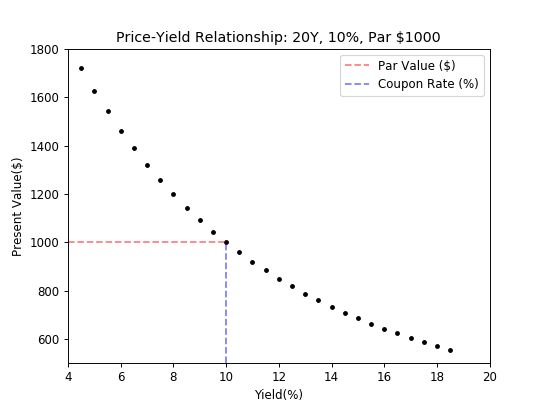

In [117]:
lowerylim = 500
upperylim = 1800
lowerxlim = 4
upperxlim = 20

plt.scatter(yields, prices, s=area, c="black", alpha=1)
plt.xlabel("Yield(%)")
plt.ylabel("Present Value($)")
plt.ylim(lowerylim, upperylim)
plt.xlim(lowerxlim, upperxlim)
plt.title("Price-Yield Relationship: 20Y, 10%, Par $1000")

xmax = (lowerxlim - c_rate)/((lowerxlim - c_rate)-(upperxlim -c_rate))

ymax = (lowerylim - par)/((lowerylim - par)-(upperylim - par))

plt.axhline(y = par, xmin = 0, xmax = xmax, color='r', linestyle='dashed',alpha=0.5,label="Par Value ($)")
plt.axvline(x = c_rate, ymin = 0, ymax = ymax, color='b', linestyle='dashed',alpha = 0.5, label="Coupon Rate (%)")
plt.legend(loc="upper right")

plt.show()